# **Step1_AI면접관 Agent v1.0**

## **0. 미션**

### 미션① : 사전 준비

* 1) 면접 사전 준비 절차 구현
    * 이력서/자소서 인식
    * State 정의
    * 서류 분석 : 요약 및 키워드 도출 (LLM)
    * 질문 전략 수립 (LLM)

* 2) 위 항목을 각각 함수나 클래스로 구성한 후, 미션① 을 하나의 함수로 묶기


### 미션② : 면접 Agent

* 1) 면접 절차 구현
    * 답변 입력
    * 답변 평가 : 관점 별, 상, 중, 하 평가 (LLM)
    * 인터뷰 진행 여부 판단 : 추가질문? 인터뷰 종료? (LLM)
    * 질문 생성 : 심화질문 생성 (LLM)
    * 최종 출력 : 질문/답변/평가 결과 출력

* 2) 위 항목을 각각 함수로 구성한 후, 미션 ②를 하나의 Agent로 구성하기


**[전체 서비스 Flow]**

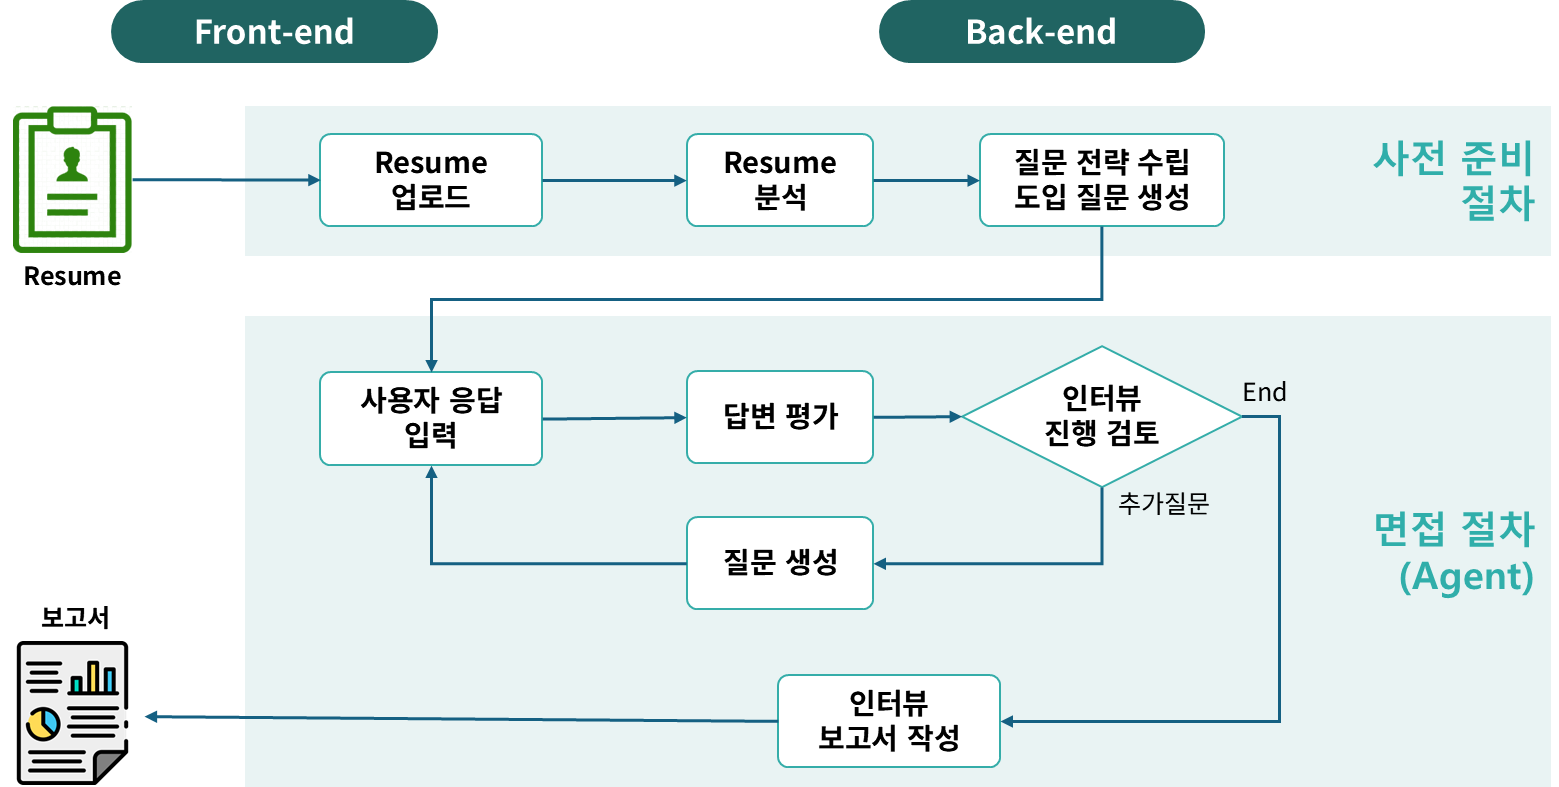

## **1. 환경준비**

### (1) 구글 드라이브

#### 1) 구글 드라이브 폴더 생성
* 새 폴더(project_genai)를 생성하고
* 제공 받은 파일을 업로드

#### 2) 구글 드라이브 연결

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (2) 라이브러리

#### 1) 필요한 라이브러리 설치

In [5]:
!pip install -r /content/drive/MyDrive/project_genai/requirements.txt -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install langchain_openai langchain_core langchain-community -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.3/469.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.24 requires langchain-core<1.0.0,>=0.3.55, but you have langchain-core 1.0.2 which is incompatible.
langchain 0.3.24 requires langchain-text-splitters<1.0.0,>=0.3.8, but you have langchain-text-splitters 1.0.0 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
google-adk 

#### 2) 라이브러리 로딩

In [7]:
import pandas as pd
import numpy as np
import os
import ast
import fitz  # PyMuPDF
from docx import Document
import random
import openai
import json
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from typing import Annotated, Literal, Sequence, TypedDict

from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser, CommaSeparatedListOutputParser
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_community.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

from langgraph.graph import StateGraph, START, END

### (3) OpenAI API Key 확인

In [8]:
def load_api_keys(filepath="api_key.txt"):
    with open(filepath, "r") as f:
        for line in f:
            line = line.strip()
            if line and "=" in line:
                key, value = line.split("=", 1)
                os.environ[key.strip()] = value.strip()

path = '/content/drive/MyDrive/project_genai/'
# API 키 로드 및 환경변수 설정
load_api_keys(path + 'api_key.txt')

⚠️ 아래 코드셀은, 실행해서 key가 제대로 보이는지 확인하고 삭제하세요.

In [9]:
print(os.environ['OPENAI_API_KEY'][:30])

sk-proj-CaQ4NDqFy8lEiNIc6L0nex


## **2. 미션① : 사전 준비**

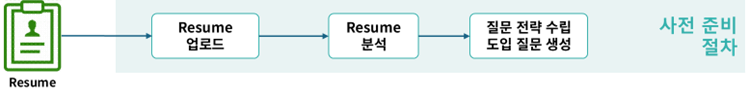

### (1) 파일 입력

* Resume 업로드 함수 제공
    * 대상 파일 : word(.docx) pdf 파일로 작성된 이력서/자소서를 입력 받아
    * text를 추출하여 저장




In [10]:
def extract_text_from_file(file_path: str) -> str:
  ext = os.path.splitext(file_path)[1].lower()
  if ext == ".pdf":
    doc = fitz.open(file_path)
    text = "\n".join(page.get_text() for page in doc)
    doc.close()
    return text
  elif ext == ".docx":
    doc = Document(file_path)
    return "\n".join(p.text for p in doc.paragraphs if p.text.strip())
  else:
    raise ValueError("지원하지 않는 파일 형식입니다. PDF 또는 DOCX만 허용됩니다.")

### (2) State 선언

* 각 노드의 입출력 관리를 위한 State 구성
    * 각 함수(노드)에서 채워가며 관리해야 할 정보를 도출
    * 이를 하나의 State로 정의
    * 가급적 구조화된 정보로 저장 권장 : str 보다는 List나 Dict
    * 개발하면서 정보가 추가됨


In [11]:
from typing import TypedDict, List, Dict

class InterviewState(TypedDict):
    # 고정 정보
    resume_text: str
    resume_summary: str
    resume_keywords: List[str]
    question_strategy: Dict[str, Dict]

    # 인터뷰 로그
    current_question: str
    current_answer: str
    current_strategy: str
    conversation: List[Dict[str, str]]
    evaluation : List[Dict[str, str]]
    next_step : str

In [12]:
# 파일에서 읽어 State 초기화
file_path = path + 'Resume_sample.pdf'

# 텍스트 추출
resume_text = extract_text_from_file(file_path)
resume_text

'<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으\n로, 그 과정에서 큰 어려

In [13]:
# 테스트를 위한 초기 상태 구성
initial_state: InterviewState = {
    "resume_text": resume_text,
    "resume_summary": '',
    "resume_keywords": [],
    "question_strategy": {},

    "current_question": '',
    "current_answer": '',
    "current_strategy": '',
    "conversation": [],
    "evaluation": [],
    "next_step" : ''
}

initial_state

{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

### (3) Resume 분석

* 목적
    * 개인화된 질문을 뽑기 위한 이력서 핵심 내용 및 키워드 도출
    * 질문 전략을 수립하기 위한 기본 자료로 사용
* 입출력
    * 입력 : 이력서/자소서 text
    * 출력 : 핵심 요약 str, 주요 키워드 List
* 처리
    * 프롬프트 템플릿 구성하여 LLM 활용한 처리
    * 요약과 키워드 도출을 한꺼번에 할 수도 있고, 단계를 나눠서 요약 따로, 키워드 도출 따로 진행도 가능


In [38]:
def analyze_resume(state: InterviewState) -> InterviewState:
    llm = ChatOpenAI(model_name='gpt-4.1-mini')

    # 이력서 핵심 요약
    summary_prompt = ChatPromptTemplate.from_messages([
        ("system", "너는 이력서 분석 전문가야."),
        ("human", "면접 질문을 위해 {resume_text}의 내용을 정확하게 파악하고 싶어. {resume_text}의 핵심 내용을 10문장 이내로 요약해줘.")
    ])

    summary_messages = summary_prompt.format_messages(resume_text = state['resume_text'])
    summary_response = llm.invoke(summary_messages)
    resume_summary = summary_response.content.strip()

    # 이력서 주요 키워드 추출
    keyword_prompt = ChatPromptTemplate.from_messages([
        ("system", "너는 이력서 분석 전문가야."),
        ("human", "면접 질문의 방향성을 잡을 수 있게 {resume_text}에서 주요 키워드 10개 이내로 뽑아서 쉼표로 구분해서 나열해줘.")
    ])
    keyword_messages = keyword_prompt.format_messages(resume_text=state['resume_text'])
    keyword_response = llm.invoke(keyword_messages)
    resume_keywords = [kw.strip() for kw in keyword_response.content.split(',')]

    return {
        **state,
        "resume_summary": resume_summary,
        "resume_keywords": resume_keywords,
    }

In [39]:
analyze_resume(initial_state)

{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

### (4) 질문 전략 수립

* 목적 : 개인화된 질문을 뽑기 위한 질문 전략 수립
* 입출력
    * 입력 : 핵심 요약 str, 주요 키워드 List
    * 출력 : 3가지 분야에 대한 전략 수립(질문 방향, 예시 질문)
* 처리 : 프롬프트 템플릿 구성하여 LLM 활용한 처리
* 전략 수립 예시
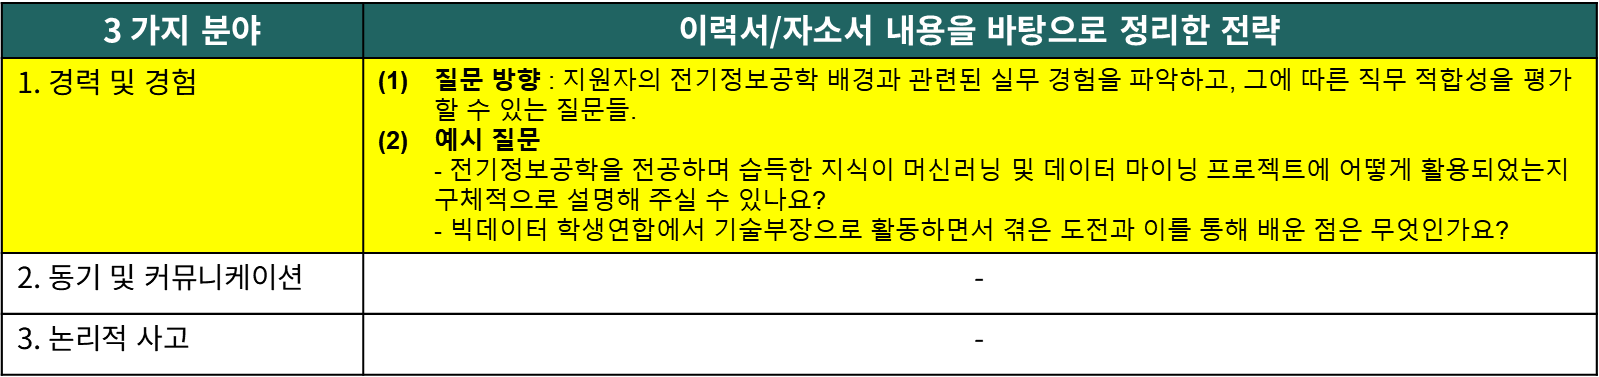

In [121]:
def generate_question_strategy(state: InterviewState) -> InterviewState:
    llm = ChatOpenAI(model_name='gpt-4.1-mini')

    # 질문 전략 수립
    s_msg = '너는 10년 이상 경력의 면접관이야.'
    h_msg = '''
    {resume_summary}와 {resume_keywords}를 바탕으로 개인화된 면접 질문을 뽑을 거야.
    아래 3가지 분야에 대해 각각 "질문 방향"과 "예시 질문"을 포함한 전략을 JSON 형태로 작성해줘.

    반드시 아래 형식을 따르세요:
    {{
        "경력 및 경험": {{
            "질문 방향": "문장으로 작성",
            "예시 질문": ["질문1", "질문2"]
        }},
        "동기 및 커뮤니케이션": {{
            "질문 방향": "문장으로 작성",
            "예시 질문": ["질문1", "질문2"]
        }},
        "논리적 사고": {{
            "질문 방향": "문장으로 작성",
            "예시 질문": ["질문1", "질문2"]
        }}
    }}

    '''

    strategy_prompt = ChatPromptTemplate.from_messages([
        ("system", s_msg),
        ("human", h_msg)
    ])

    strategy_messages = strategy_prompt.format_messages(resume_summary = state['resume_summary'], resume_keywords = state['resume_keywords'])
    strategy_response = llm.invoke(strategy_messages)
    strategy_output = strategy_response.content.strip()

    # JSON 파싱
    try:
        strategy_dict = json.loads(strategy_output)
    except json.JSONDecodeError:
        print("⚠️ JSON 파싱 실패 - 문자열 그대로 저장합니다.")
        strategy_dict = {"raw_output": strategy_output}

    return {
        **state,
        "question_strategy": strategy_dict
    }

In [33]:
generate_question_strategy(initial_state)

{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

### (5) 하나로 묶기

* 목적
    * 사전 준비 절차는 한꺼번에 1회성으로 실행되도록 각 단계를 하나의 함수로 묶음
* 입출력
    * 입력 : 이력서/자소서 파일
    * 출력 : State
* 처리
    * 함수 이름 : preProcessing_Interview
    * 구축한 함수들을 순차적으로 실행되도록 구성
    * 첫번째 질문 생성
        * 질문 전략 수립 시 생성한 ‘경력 및 경험’의
        * 예시 질문을 첫번째 질문으로 구성하기


In [45]:
def preProcessing_Interview(file_path: str) -> InterviewState:
    # 파일 입력
    resume_text = extract_text_from_file(file_path)

    # state 초기화
    initial_state: InterviewState = {
        "resume_text": resume_text,
        "resume_summary": '',
        "resume_keywords": [],
        "question_strategy": {},

        "current_question": '',
        "current_answer": '',
        "current_strategy": '',
        "conversation": [],
        "evaluation": [],
        "next_step" : ''
    }

    # Resume 분석
    state = analyze_resume(initial_state)

    # 질문 전략 수립
    state = generate_question_strategy(state)

    # 첫번째 질문 생성
    selected_question = state['question_strategy']['경력 및 경험']['예시 질문'][0]

    return {
            **state,
            "current_question": selected_question,
            "current_strategy": "경력 및 경험"
            }

In [73]:
state_ex = preProcessing_Interview(path + 'Resume_sample.pdf')
state_ex

{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

## **3. 미션② : 면접 Agent**

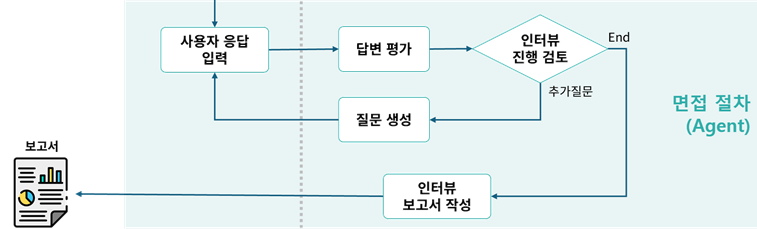

### (1) 답변 입력

* 사용자 답변을 입력 받아 State의 current_answer에 저장

In [103]:
def update_current_answer(state: InterviewState) -> InterviewState:
    user_answer = input('답변을 입력하세요 : ')
    return {
        **state,
        "current_answer": user_answer.strip()
    }

In [77]:
state_ex = update_current_answer(state_ex)
state_ex

답변을 입력하세요 : KT AI 연구소 인턴 기간 동안 OCR 기반 문서 처리 시스템 고도화 프로젝트에 참여했습니다. 당시 목표는 법률문서 내 텍스트 인식 정확도를 높이는 것이었는데, 기존 Tesseract OCR만으로는 문서의 표 형식이나 문장 구조를 제대로 인식하지 못하는 문제가 있었습니다.  이를 개선하기 위해 OCR 결과를 딥러닝 기반 후처리 모델로 보정하는 파이프라인을 설계했습니다. 먼저 Tesseract로 추출한 결과를 토큰 단위로 분리하고, 문장 내 문맥적 오류를 검출하기 위해 BiLSTM 기반의 시퀀스 모델을 적용했습니다. 또한, 잘못 인식된 숫자나 한글 자모 분리 현상을 해결하기 위해 데이터 정제 및 사전기반 교정 알고리즘을 병행했습니다.  이 과정에서 가장 어려웠던 점은 데이터 품질 불균형과 문서 형식 다양성이었습니다. 특히 법률문서의 경우 문단 구조가 일정하지 않아 모델 학습 시 일반화가 잘 되지 않았는데, 이를 해결하기 위해 샘플 데이터를 유형별로 분류하고 증강한 후 모델을 재학습시켰습니다.  결과적으로 시스템 전체 OCR 인식 정확도를 약 12% 개선할 수 있었고, 이 경험을 통해 문제 정의부터 모델링, 성능 개선까지의 전체 흐름을 실무적으로 이해할 수 있었다는 점이 가장 큰 성과였습니다.


{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

### (2) 답변 평가
* 목적 : 면접자의 답변이 적절한지 평가
* 입출력
    * 입력 : State
    * 출력 : State(답변, 평가가 포함된)
* 평가
    * 평가 항목 : 두 가지(질문과의 연관성, 답변의 구체성)로 정하되 추가 가능
    * 평가 등급 : 상, 중, 하(상, 중, 하에 대한 등급 기준 설명 예시)
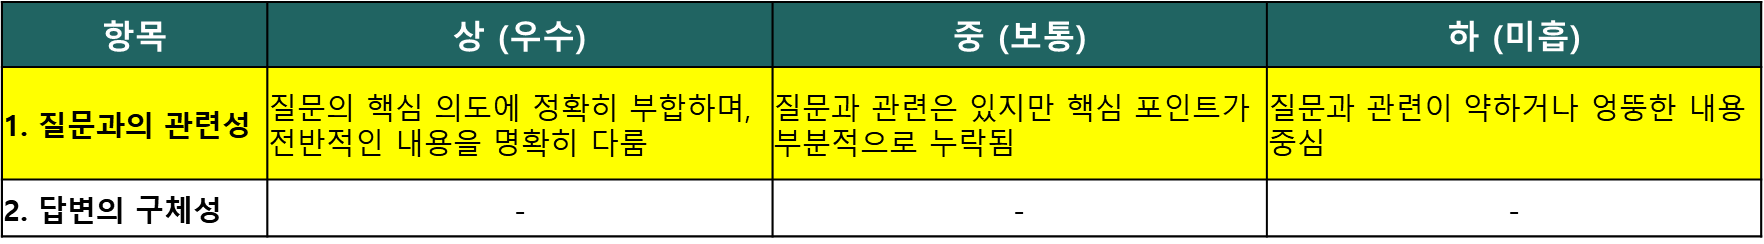

* 질문 답변 내용 conversation에 추가



In [60]:
def evaluate_answer(state: InterviewState) -> InterviewState:
    # 답변 평가
    llm = ChatOpenAI(model_name='gpt-4.1-mini')

    s_msg = '너는 10년 이상 경력의 면접관이야.'
    h_msg = '''
    아래 질문과 답변을 보고 면접 답변이 적절한지 아래 2가지 항목을 각각 상, 중, 하로 평가해줘.

    질문: {current_question}
    답변: {current_answer}

    평가 항목:
    1. 질문과의 관련성
    - 상: 질문의 핵심 의도에 정확히 부합하며, 전반적인 내용을 명확히 다룸
    - 중: 질문과 관련은 있지만 핵심 포인트가 부분적으로 누락됨
    - 하: 질문과 관련이 약하거나 엉뚱한 내용 중심

    2. 답변의 구체성
    - 상: 질문의 핵심적인 내용을 구체적으로 서술함
    - 중: 답변에 부분적으로 두루뭉술한 내용이 섞여있음
    - 하: 답변이 너무 짧거나 답변자가 구체적으로 어떤 행동을 했고 어떤 생각을 했는지 드러나있지 않음

    출력 형식(JSON):
    {{
        "질문과의 관련성": "상/중/하 중 하나",
        "답변의 구체성": "상/중/하 중 하나"
    }}
    '''

    evaluate_prompt = ChatPromptTemplate.from_messages([
        ("system", s_msg),
        ("human", h_msg)
    ])

    evaluate_messages = evaluate_prompt.format_messages(current_question = state["current_question"], current_answer = state["current_answer"])
    evaluate_response = llm.invoke(evaluate_messages)
    evaluate_output = evaluate_response.content.strip()

    try:
        eval_dict = json.loads(evaluate_output)
    except json.JSONDecodeError:
        # 형식이 안 맞으면 fallback 처리
        eval_dict = {"질문과의 관련성": "중", "답변의 구체성": "중"}

    conversation = state.get("conversation", [])
    evaluation = state.get("evaluation", [])

    conversation.append({
        "질문": state["current_question"],
        "답변": state["current_answer"]
    })
    evaluation.append(eval_dict)

    return {
        **state,
        "conversation": conversation,
        "evaluation": evaluation
    }

In [78]:
state_ex = evaluate_answer(state_ex)
state_ex

{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

### (3) 인터뷰 진행 검토

* 목적
    * 인터뷰가 길어지지 않도록 진행 제한
        * 질문&답변 이 3회 초과 되었으면 멈춤 (end)
        * 아니면 추가 질문 생성 (additional_question)
* 입출력
    * 입력 : State
    * 출력 : State(next_step에 내용이 포함된)
* LLM 없이 규칙 기반(if ~ else)로만 구현


In [109]:
def decide_next_step(state: InterviewState) -> InterviewState:
    if len(state['conversation']) < 3:
        next_step = 'additional_question'
    else:
        next_step = 'end'

    return {
        **state,
        "next_step": next_step
    }

In [79]:
state_ex = decide_next_step(state_ex)
state_ex

{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

### (4) 질문 생성

* 목적 : 이전 질문 답변을 검토한 후 추가 심화 질문 생성
* 입출력
    * 입력 : State
    * 출력 : State(current_question 에 질문 추가, current_answer 는 빈 값)
* 처리
    * 이력서 요약, 키워드, 질문전략, 이전 질문과 답변, 평가를 기반으로
    * 지원자의 사고력, 문제 해결 방식, 혹은 기술적 깊이를 더 확인할 수 있는 심화 인터뷰 질문 생성


In [82]:
def generate_question(state: InterviewState) -> InterviewState:
    llm = ChatOpenAI(model_name='gpt-4.1-mini')

    s_msg = '너는 10년 이상 경력의 면접관이야.'
    h_msg = '''
    {state} 내용 중 이력서 요약, 키워드, 질문전략, 이전 질문과 답변, 평가 등을 기반으로
    지원자의 사고력, 문제 해결 방식, 혹은 기술적 깊이를 더 확인할 수 있도록 추가적인 심화 인터뷰 질문을 하나 만들어줘.
    '''

    chat_prompt = ChatPromptTemplate.from_messages([
        ("system", s_msg),
        ("human", h_msg)
    ])

    chat_messages = chat_prompt.format_messages(state = state)
    response = llm.invoke(chat_messages)

    return {
        **state,
        "current_question": response.content.strip(),
        "current_answer": ""
    }

In [85]:
state_ex = generate_question(state_ex)
state_ex

{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

### (5) 인터뷰 피드백 보고서
* 목적 : 인터뷰를 종료하며, 인터뷰 내용과 평가내용 화면 출력
* 입출력
    * 입력 : State
    * 출력 : State
* 처리 : 질문 / 답변 / 평가에 대한 순차적 출력


In [100]:
def summarize_interview(state: InterviewState) -> InterviewState:
    print('인터뷰 종료 리포트')
    print('----------------------------------------------------')
    for i, conv in enumerate(state['conversation']):
      print(f"[질문 {i+1}] : {conv['질문']}")
      print(f"[답변 {i+1}] : {conv['답변']}")
      eval_str = ', '.join([f"{k}: {v}" for k, v in state["evaluation"][i].items()])
      print(f"[평가] : {eval_str}")
      print('----------------------------------------------------')

    return state

In [101]:
state_ex = summarize_interview(state_ex)

인터뷰 종료 리포트
----------------------------------------------------
[질문 1] : KT AI 연구소 인턴 당시 OCR 기반 문서 처리 시스템을 고도화하면서 가장 어려웠던 기술적 도전은 무엇이었으며, 이를 어떻게 극복했나요?
[답변 1] : KT AI 연구소 인턴 기간 동안 OCR 기반 문서 처리 시스템 고도화 프로젝트에 참여했습니다. 당시 목표는 법률문서 내 텍스트 인식 정확도를 높이는 것이었는데, 기존 Tesseract OCR만으로는 문서의 표 형식이나 문장 구조를 제대로 인식하지 못하는 문제가 있었습니다.  이를 개선하기 위해 OCR 결과를 딥러닝 기반 후처리 모델로 보정하는 파이프라인을 설계했습니다. 먼저 Tesseract로 추출한 결과를 토큰 단위로 분리하고, 문장 내 문맥적 오류를 검출하기 위해 BiLSTM 기반의 시퀀스 모델을 적용했습니다. 또한, 잘못 인식된 숫자나 한글 자모 분리 현상을 해결하기 위해 데이터 정제 및 사전기반 교정 알고리즘을 병행했습니다.  이 과정에서 가장 어려웠던 점은 데이터 품질 불균형과 문서 형식 다양성이었습니다. 특히 법률문서의 경우 문단 구조가 일정하지 않아 모델 학습 시 일반화가 잘 되지 않았는데, 이를 해결하기 위해 샘플 데이터를 유형별로 분류하고 증강한 후 모델을 재학습시켰습니다.  결과적으로 시스템 전체 OCR 인식 정확도를 약 12% 개선할 수 있었고, 이 경험을 통해 문제 정의부터 모델링, 성능 개선까지의 전체 흐름을 실무적으로 이해할 수 있었다는 점이 가장 큰 성과였습니다.
[평가] : 질문과의 관련성: 상, 답변의 구체성: 상
----------------------------------------------------


### (6) 면접 Agent

* 목적 : [사용자 답변 입력 ~ 질문 출력/종료] 까지 한 Agent로 구성
* Agent 입출력
    * 입력 : State, 면접자 답변
    * 출력 : State, 인터뷰 보고서
* 처리 : 각 함수(노드)를 흐름에 맞게 연결하기


In [122]:
# 분기 판단 함수
def route_next(state: InterviewState) -> Literal["generate", "summarize"]:
    return "additional_question" if state["next_step"] == "additional_question" else "end"

# 그래프 정의 시작
builder = StateGraph(InterviewState)

# 노드 추가
builder.add_node("evaluate", evaluate_answer)
builder.add_node("decide", decide_next_step)
builder.add_node("generate", generate_question)
builder.add_node("summarize", summarize_interview)

# 노드 연결
builder.add_conditional_edges("decide", route_next,
                              {"additional_question": "generate", "end": "summarize"}
                              )

builder.set_entry_point("evaluate")
builder.add_edge("evaluate", "decide")
builder.set_finish_point("generate")
builder.set_finish_point("summarize")

# 컴파일
graph = builder.compile()

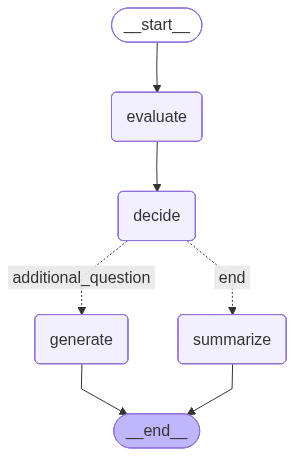

In [111]:
graph

## **4. 시스템 실행**

미션1,2에서 수행한 결과를 통합 테스트 해 봅시다.

### (1) 인터뷰 사전준비 작업

In [123]:
# 파일 입력
file_path = path + 'Resume_sample.pdf'
state = preProcessing_Interview(file_path)
state

{'resume_text': '<이력서> \n홍길동 (Gil-dong Hong) \n이메일: gildong.hong@example.com \n전화번호: 010-1234-5678 \n학력 \n- 한국대학교 전기정보공학부 학사 (2018.03 ~ 2022.02) \n  GPA: 3.91 / 4.3, 전공과목: 머신러닝, 데이터마이닝, 신호처리 \n경력 \n- KT, AI 연구소 인턴 (2021.07 ~ 2021.12) \n  • OCR 기반 문서 처리 시스템 고도화 \n  • Tesseract + 딥러닝 후처리 파이프라인 설계 \n  • 사내 법률문서 정제 정확도 12% 개선 \n- 빅데이터 학생연합 (BDSA) 기술부장 (2020.03 ~ 2021.02) \n  • Python 기반 크롤러 및 Flask API 개발 \n  • 공공데이터 기반 부동산 가격 예측 프로젝트 리드 \n프로젝트 \n- AI 면접관 시스템 개발 (졸업 과제) \n  • OpenAI GPT + Streamlit + FAISS 기반 질문-응답 시스템 구현 \n  • 이력서 기반 질문 자동 생성 + 답변 피드백 제공 \n- 딥러닝 기반 교통량 예측 (교과목 프로젝트) \n  • LSTM 기반 모델 + 서울시 교통데이터 \n  • MAE 15% 이하로 개선 \n기술 스택 \n- Python, PyTorch, TensorFlow, OpenCV \n- MySQL, MongoDB, Git, Docker \n\n- 영어 (TOEIC 915, 영어면접 가능) \n수상 및 자격 \n- SKT Big Data Challenge 2021 장려상 \n- 정보처리기사 (2022.05 취득) \n기타 \n- Github: github.com/gildong-ai \n- 블로그: blog.naver.com/gildong_dev \n \n \n\n<자기소개서> \n1. 본인 성격의 강/약점에 대해서 실제 사례를 포함하여 작성해 주세요. \n무엇인가 한번 빠져들면 해결하거나 성취할 때까지 모든 열정/노력을 쏟아붓는 성격으

### (2) Agent 실행

In [124]:
# 사용자 응답 루프
while True:
    print("\n[질문]")
    print(state["current_question"])

    state = update_current_answer(state)

    # 그래프 실행: 평가 → 판단 → 다음 질문 생성 or 종료
    state = graph.invoke(state)

    if state["next_step"] == "end":
        break


[질문]
KT AI 연구소 인턴 기간 동안 OCR 기반 문서 처리 시스템 고도화에 대해 자세히 설명해주시고, 본인이 맡은 역할과 기술적 도전 과제는 무엇이었나요?
답변을 입력하세요 : KT AI 연구소 인턴 기간 동안 OCR 기반 문서 처리 시스템 고도화 프로젝트에 참여했습니다. 당시 목표는 법률문서 내 텍스트 인식 정확도를 높이는 것이었는데, 기존 Tesseract OCR만으로는 문서의 표 형식이나 문장 구조를 제대로 인식하지 못하는 문제가 있었습니다.  이를 개선하기 위해 OCR 결과를 딥러닝 기반 후처리 모델로 보정하는 파이프라인을 설계했습니다. 먼저 Tesseract로 추출한 결과를 토큰 단위로 분리하고, 문장 내 문맥적 오류를 검출하기 위해 BiLSTM 기반의 시퀀스 모델을 적용했습니다. 또한, 잘못 인식된 숫자나 한글 자모 분리 현상을 해결하기 위해 데이터 정제 및 사전기반 교정 알고리즘을 병행했습니다.  이 과정에서 가장 어려웠던 점은 데이터 품질 불균형과 문서 형식 다양성이었습니다. 특히 법률문서의 경우 문단 구조가 일정하지 않아 모델 학습 시 일반화가 잘 되지 않았는데, 이를 해결하기 위해 샘플 데이터를 유형별로 분류하고 증강한 후 모델을 재학습시켰습니다.  결과적으로 시스템 전체 OCR 인식 정확도를 약 12% 개선할 수 있었고, 이 경험을 통해 문제 정의부터 모델링, 성능 개선까지의 전체 흐름을 실무적으로 이해할 수 있었다는 점이 가장 큰 성과였습니다.

[질문]
인턴십 기간 동안 OCR 후처리 파이프라인 설계 시 BiLSTM 기반 시퀀스 모델을 사용하셨는데, 해당 모델의 아키텍처 및 학습 과정에서 특히 중점을 두었던 부분과, 성능 향상을 위해 어떤 하이퍼파라미터 튜닝이나 데이터 전처리 기법을 적용하셨는지 구체적으로 설명해 주시겠습니까?
답변을 입력하세요 : 잘 해결했습니다.

[질문]
인턴십에서 BiLSTM 기반 시퀀스 모델을 사용해 OCR 후처리 파이프라인을 설계하셨는데, 모델의 일반화 성능을 높이기 위해 데이터 증강이나 정규화 외에 